In [1]:
# All the life cycle in a datascience project
# Data Analysis
# Exploratory data analysis
# Feature Engineering
# Feature Selection
# Model Building
# Model Deployment

In [2]:
##Data Analysis Phase
##Main aim is to understand the data
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from itertools import combinations


%matplotlib inline

import os
##Display all the columns of the dataframe
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# !unzip mangrove_data.zip

In [5]:
os.chdir("/content/drive/MyDrive/")

In [6]:
pizza_sales_df = pd.read_excel("Pizza Sales.xlsx")
pizza_sales_df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [7]:
print("shape of pizza_sales_df:", pizza_sales_df.shape)
print("dataframe columns:", pizza_sales_df.columns.to_list())

shape of pizza_sales_df: (48620, 12)
dataframe columns: ['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date', 'order_time', 'unit_price', 'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']


In [8]:
pizza_sales_df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [9]:
pizza_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [10]:
#additional check for missing values
pizza_sales_df.isnull().sum() #no missing values was detected

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [11]:
#check for duplicates
duplicates = pizza_sales_df.duplicated()
duplicate_rows = pizza_sales_df[duplicates]
len(duplicate_rows) #no duplicate rows was detected
# df_no_redundancy = df.drop_duplicates()


0

#Informations de base :
## Combien de pizzas uniques (pizza_id distincts) y a-t-il dans le jeu de données ?

In [12]:
# Number of unique pizzas
unique_pizzas = pizza_sales_df['pizza_id'].nunique()
print("Number of unique pizzas:", unique_pizzas)# we have 91 unique pizzas comprising of various sizes, lets dig in and make sure there are no typos

Number of unique pizzas: 91


In [13]:
pizza_unique_vc = pizza_sales_df["pizza_id"].value_counts().sort_index()
print(pizza_unique_vc.head()) #no typos or mispelling detected using head and tail for further exploration

bbq_ckn_l        967
bbq_ckn_m        926
bbq_ckn_s        479
big_meat_s      1811
brie_carre_s     480
Name: pizza_id, dtype: int64


In [14]:
#no of unique pizza's without sizes
#lets split up using the underscore delimiter(_)
pizza_unique_vc_wid = pizza_sales_df["pizza_id"].str.split("_").str[:-1].str.join('_')

In [15]:
pizza_unique_vc_wid.value_counts().index

Index(['classic_dlx', 'bbq_ckn', 'hawaiian', 'pepperoni', 'thai_ckn',
       'cali_ckn', 'sicilian', 'spicy_ital', 'southw_ckn', 'four_cheese',
       'ital_supr', 'big_meat', 'veggie_veg', 'mexicana', 'napolitana',
       'spinach_fet', 'prsc_argla', 'peppr_salami', 'ital_cpcllo', 'the_greek',
       'five_cheese', 'pep_msh_pep', 'green_garden', 'ckn_alfredo',
       'ital_veggie', 'ckn_pesto', 'spin_pesto', 'soppressata', 'spinach_supr',
       'calabrese', 'mediterraneo', 'brie_carre'],
      dtype='object')

In [16]:
len(pizza_unique_vc_wid.unique()) # there are 32 unique pizza without the sizes been taken into consideration

32

##b. Combien de commandes uniques (order_id distincts) figurent dans le jeude données ?

In [17]:
unique_orders = pizza_sales_df['order_id'].nunique()
print("Number of unique orders:", unique_orders)

Number of unique orders: 21350


In [18]:
# Discover the range of unique values
min_value = pizza_sales_df['order_id'].min()
max_value = pizza_sales_df['order_id'].max()

# Print the range of unique values
print(f"Range of unique values: {min_value} to {max_value}")

Range of unique values: 1 to 21350


#3. Analyse temporelle :
## a. Quelle est la plage de dates dans le jeu de données ?

In [19]:
min_order_date = pizza_sales_df['order_date'].min()
max_order_date = pizza_sales_df['order_date'].max()

print("Earliest order date:", min_order_date)
print("Latest order date:", max_order_date)

Earliest order date: 2015-01-01 00:00:00
Latest order date: 2015-12-31 00:00:00


## b. Combien de commandes ont été passées chaque jour ?


In [20]:
# Counting the number of unique orders placed each day
orders_per_day = pizza_sales_df.groupby('order_date')['order_id'].nunique()
print(orders_per_day.head())


order_date
2015-01-01    69
2015-01-02    67
2015-01-03    66
2015-01-04    52
2015-01-05    54
Name: order_id, dtype: int64


In [21]:
print("average orders per day:", orders_per_day.mean().round(2))


average orders per day: 59.64


In [22]:

# Assuming 'order_date' is a datetime column in your DataFrame
pizza_sales_df['order_date'] = pd.to_datetime(pizza_sales_df['order_date'])

# Calculate the number of unique orders per day
orders_per_day = pizza_sales_df.groupby(pizza_sales_df['order_date'].dt.date)['order_id'].nunique()
# print(orders_per_day.head())

# Find the date with the maximum and minimum orders
max_orders_date = orders_per_day.idxmax()
min_orders_date = orders_per_day.idxmin()

print(f"Max Orders Date and value:", max_orders_date, "-", orders_per_day.max())
print(f"Min Orders Date and value:", min_orders_date,"-", orders_per_day.min())


Max Orders Date and value: 2015-11-27 - 115
Min Orders Date and value: 2015-12-29 - 27


##c. Quelle est la durée moyenne pour traiter une commande ?

###To calculate the average processing time for an order, we need to first determine the processing time for each order. However, it appears that the dataset does not directly provide the processing time or completion time for each order.

###In order to calculate processing time, we typically need both the order placement time and the order completion time. If the dataset includes these timestamps, we can subtract the order placement time from the completion time to get the processing time for each order. With the current dataset, it's not possible to calculate the average processing time for an order.


Given that we don't have explicit data on the completion or delivery time of the orders, we can still conduct some exploratory analysis based on reasonable hypotheses. Here are a few hypotheses we can explore with the data available:

Order Processing Time by Pizza Category: We can assume that different categories of pizzas (like Classic, Veggie, Supreme) might take different amounts of time to prepare. By analyzing the number of pizzas ordered from each category, we might hypothesize about the relative time it takes to process orders from each category.

Pizza Category Counts:
 Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: pizza_category, dtype: int64


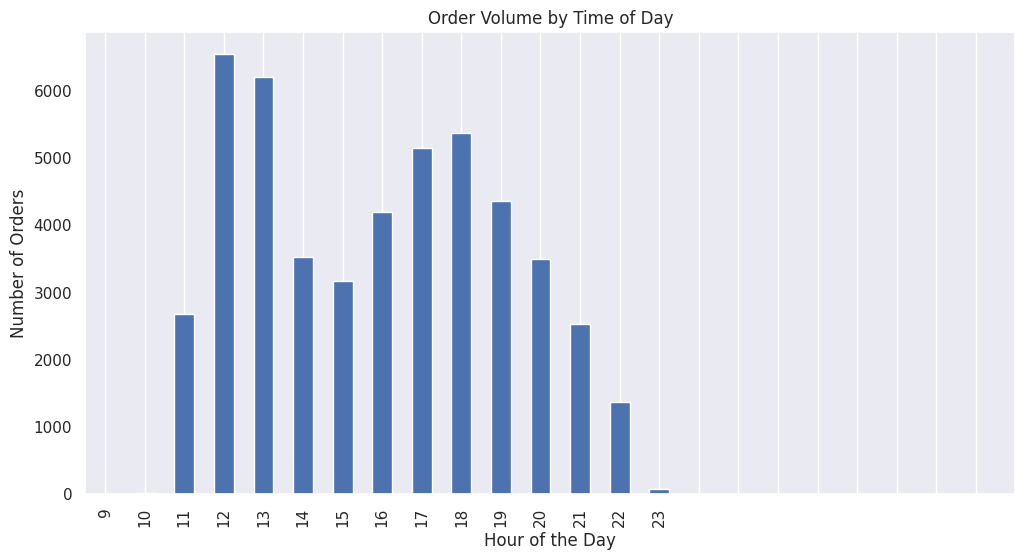

Average Order Size:  2.321967213114754
Average Pizza Price:  16.494132044426163
Average Price by Category:
 pizza_category
Chicken    17.709408
Classic    14.797490
Supreme    17.363229
Veggie     16.612639
Name: unit_price, dtype: float64


In [23]:
# Analysis 1: Count of Pizzas Ordered by Category
pizza_category_counts = pizza_sales_df['pizza_category'].value_counts()
print("Pizza Category Counts:\n", pizza_category_counts)

# Analysis 2: Order Volume by Time of Day
# Convert order_time to just hours
pizza_sales_df['order_time'] = pd.to_datetime(pizza_sales_df['order_time'], format='%H:%M:%S')
pizza_sales_df['hour_of_day'] = pizza_sales_df['order_time'].dt.hour

# Counting the number of orders in each hour
hourly_order_distribution = pizza_sales_df['hour_of_day'].value_counts().sort_index()
pizza_sales_df
# Plotting the distribution
plt.figure(figsize=(12, 6))
hourly_order_distribution.plot(kind='bar')
plt.title('Order Volume by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()

# Analysis 3: Average Order Size (Quantity of Pizzas per Order)
average_order_size = pizza_sales_df.groupby('order_id')['quantity'].sum().mean()
print("Average Order Size: ", average_order_size)

# Analysis 4: Average Price of Pizzas Overall and by Category
average_pizza_price = pizza_sales_df['unit_price'].mean()
average_price_by_category = pizza_sales_df.groupby('pizza_category')['unit_price'].mean()
print("Average Pizza Price: ", average_pizza_price)
print("Average Price by Category:\n", average_price_by_category)

#4. Analyse de la quantité :
##a. Quelle est la quantité moyenne de pizzas commandées ?

In [24]:
# Calculating the average quantity of pizzas ordered
average_pizza_quantity = pizza_sales_df['quantity'].mean()
rounded_average_pizza_quantity = round(average_pizza_quantity, 2)

print("Average quantity of pizzas ordered per order:", rounded_average_pizza_quantity)


Average quantity of pizzas ordered per order: 1.02


# Calculating the average quantity of pizzas ordered by hour

pizza_sales_df['order_time'] = pd.to_datetime(pizza_sales_df['order_time'], format='%H:%M:%S')
pizza_sales_df['hour_of_day'] = pizza_sales_df['order_time'].dt.hour
pizza_sales_df['minute_of_day'] = pizza_sales_df['order_time'].dt.minute

average_pizza_quantity_per_hour = pizza_sales_df.groupby(pizza_sales_df['minute_of_day'])['quantity'].mean()
average_pizza_quantity

In [25]:
# Finding the most frequently ordered pizza size
most_frequent_pizza_size = pizza_sales_df['pizza_size'].mode()
print("Most frequently ordered pizza size:", most_frequent_pizza_size)

#The most frequently ordered pizza size in the dataset is size 'L' (Large).

Most frequently ordered pizza size: 0    L
Name: pizza_size, dtype: object


In [26]:
# Finding the most frequently ordered pizza category
most_frequent_pizza_category = pizza_sales_df['pizza_category'].mode()[0]
print("Most frequently ordered pizza category:", most_frequent_pizza_category)


Most frequently ordered pizza category: Classic


#5. Analyse des prix :
##a. Quel est le prix unitaire moyen des pizzas ?

In [27]:
# Calculating the average unit price of pizzas
average_unit_price = pizza_sales_df['unit_price'].mean()
average_unit_price_rounded = round(average_unit_price, 2)

print("Average unit price of pizzas:", average_unit_price_rounded)


Average unit price of pizzas: 16.49


##b. Quel est le prix total moyen d'une commande ?

In [28]:
# Calculating the average total price per order
# Summing the total prices for each order

total_price_per_order = pizza_sales_df.groupby('order_id')['total_price'].sum()
# Calculating the average of these total prices
average_total_price_per_order = total_price_per_order.mean()
average_total_price_per_order_rounded = round(average_total_price_per_order, 2)
print("Average total price of an order:", average_total_price_per_order_rounded)

Average total price of an order: 38.31


##c. Quelle pizza a le prix unitaire le plus élevé ?

In [29]:
# Finding the pizza(s) with the highest unit price
highest_unit_price_pizza = pizza_sales_df[pizza_sales_df['unit_price'] == pizza_sales_df['unit_price'].max()]
print(highest_unit_price_pizza[['pizza_name', 'unit_price']])


            pizza_name  unit_price
3447   The Greek Pizza       35.95
3563   The Greek Pizza       35.95
5901   The Greek Pizza       35.95
6365   The Greek Pizza       35.95
7490   The Greek Pizza       35.95
9844   The Greek Pizza       35.95
10282  The Greek Pizza       35.95
10875  The Greek Pizza       35.95
13511  The Greek Pizza       35.95
13779  The Greek Pizza       35.95
14029  The Greek Pizza       35.95
15330  The Greek Pizza       35.95
17114  The Greek Pizza       35.95
19441  The Greek Pizza       35.95
20497  The Greek Pizza       35.95
22903  The Greek Pizza       35.95
23298  The Greek Pizza       35.95
30207  The Greek Pizza       35.95
32199  The Greek Pizza       35.95
35953  The Greek Pizza       35.95
36037  The Greek Pizza       35.95
36507  The Greek Pizza       35.95
37943  The Greek Pizza       35.95
39732  The Greek Pizza       35.95
41182  The Greek Pizza       35.95
42717  The Greek Pizza       35.95
43040  The Greek Pizza       35.95
47489  The Greek Piz

In [30]:
# Finding a single instance of the pizza with the highest unit price
highest_unit_price_pizza_single = highest_unit_price_pizza[['pizza_name', 'unit_price']].drop_duplicates().iloc[0]
print(highest_unit_price_pizza_single)

pizza_name    The Greek Pizza
unit_price              35.95
Name: 3447, dtype: object


In [31]:
(pizza_sales_df[pizza_sales_df['pizza_name'] == "The Greek Pizza"]["pizza_ingredients"])

11       Kalamata Olives, Feta Cheese, Tomatoes, Garlic...
34       Kalamata Olives, Feta Cheese, Tomatoes, Garlic...
38       Kalamata Olives, Feta Cheese, Tomatoes, Garlic...
84       Kalamata Olives, Feta Cheese, Tomatoes, Garlic...
121      Kalamata Olives, Feta Cheese, Tomatoes, Garlic...
                               ...                        
48372    Kalamata Olives, Feta Cheese, Tomatoes, Garlic...
48418    Kalamata Olives, Feta Cheese, Tomatoes, Garlic...
48436    Kalamata Olives, Feta Cheese, Tomatoes, Garlic...
48529    Kalamata Olives, Feta Cheese, Tomatoes, Garlic...
48540    Kalamata Olives, Feta Cheese, Tomatoes, Garlic...
Name: pizza_ingredients, Length: 1406, dtype: object

#6. Répartition par taille et catégorie :
##a. Combien de pizzas de chaque taille ont été vendues ?

In [32]:
# Counting the number of pizzas sold for each size
pizzas_by_size = pizza_sales_df.groupby('pizza_size')['quantity'].sum()
print(pizzas_by_size)


pizza_size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64


In [33]:
# pizzas_by_size

##b. Combien de pizzas y a-t-il dans chaque catégorie ?

In [34]:
# Counting the number of pizzas in each category
pizzas_by_category = pizza_sales_df.groupby('pizza_category')['quantity'].sum()
print(pizzas_by_category)


pizza_category
Chicken    11050
Classic    14888
Supreme    11987
Veggie     11649
Name: quantity, dtype: int64


#7. Analyse des ingrédients :
##a. Quels sont les ingrédients les plus couramment utilisés dans toutes les pizzas ?

In [35]:
from collections import Counter

# Splitting the ingredients and counting their occurrences
ingredient_counts = Counter()
pizza_sales_df['pizza_ingredients'].str.split(',').apply(ingredient_counts.update)

# Getting the most common ingredients
most_common_ingredients = ingredient_counts.most_common()
#print top 5 most common ingredients
print(most_common_ingredients[:5])

[(' Garlic', 27422), (' Tomatoes', 23694), (' Red Onions', 19547), (' Red Peppers', 16284), ('Chicken', 8443)]


##b. Combien de pizzas contiennent un ingrédient spécifique (par exemple,pepperoni, champignons) ?

In [36]:
def contains_combination_ingredients(row, ingredient_combination):
    return all(ingredient in row for ingredient in ingredient_combination)

# List of ingredients to check
ingredients = ["Pepperoni", "Mushrooms", "Garlic", "Tomatoes", "Red Onions",
               "Red Peppers", "Mozzarella Cheese", "Spinach", "Chicken", "Capocollo",
               "Green Olives", "Artichokes", "Jalapeno Peppers", "Green Peppers",
               "Feta Cheese", "Pineapple", "Bacon"]

combinations_2 = list(combinations(ingredients, 2))
combination_counts_2 = {combo: pizza_sales_df['pizza_ingredients'].apply(lambda x: contains_combination_ingredients(x, combo)).sum() for combo in combinations_2}

sample_counts_2 = list(combination_counts_2.items())

len(sample_counts_2)

136

#8. Détails de la commande :
##a. Quelle est la répartition du nombre de pizzas par commande ?

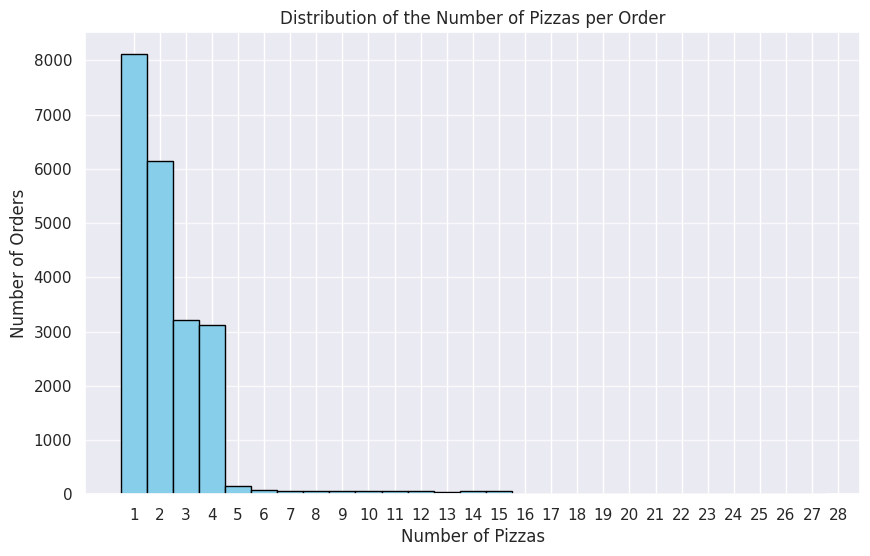

In [37]:
# Grouping by order_id and summing the quantities of pizzas for each order
pizzas_per_order = pizza_sales_df.groupby('order_id')['quantity'].sum()

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(pizzas_per_order, bins=range(1, pizzas_per_order.max() + 1), align='left', color='skyblue', edgecolor='black')
plt.xlabel('Number of Pizzas')
plt.ylabel('Number of Orders')
plt.title('Distribution of the Number of Pizzas per Order')
plt.xticks(range(1, pizzas_per_order.max() + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()


##b. Quelle est la répartition des prix totaux pour les commandes ?

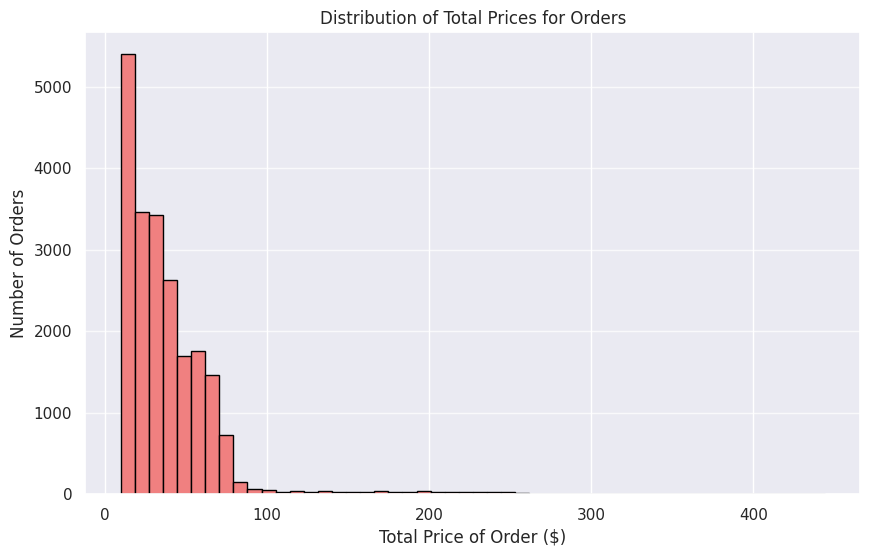

In [38]:
# Calculating the total price for each order
total_price_distribution = pizza_sales_df.groupby('order_id')['total_price'].sum()

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(total_price_distribution, bins=50, color='lightcoral', edgecolor='black')
plt.xlabel('Total Price of Order ($)')
plt.ylabel('Number of Orders')
plt.title('Distribution of Total Prices for Orders')
plt.grid(axis='y', alpha=0.75)
plt.show()


#9. Analyse du chiffre d’affaires en fonction du temps :
##a. Quel est le chiffre d'affaires quotidien ?

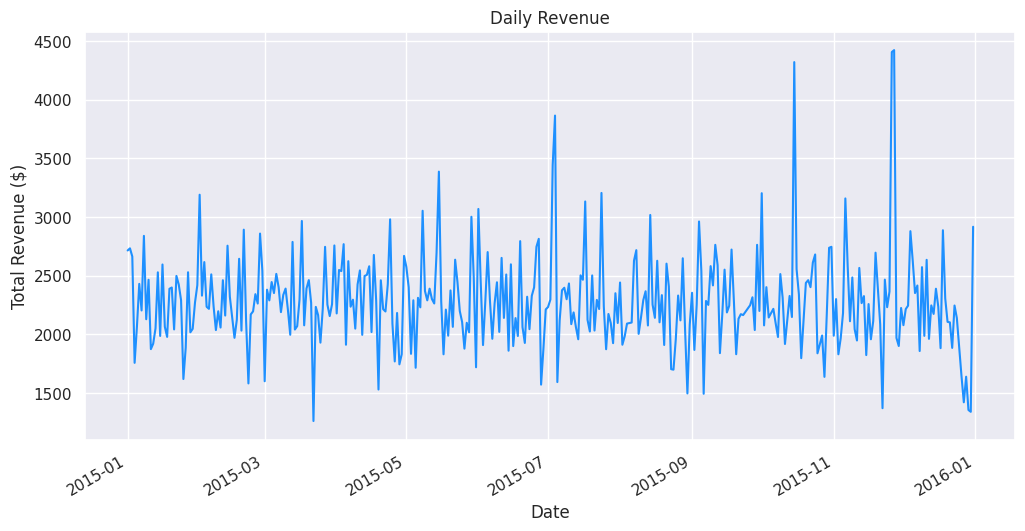

In [39]:
daily_revenue = pizza_sales_df.groupby('order_date')['total_price'].sum()

# Creating a line chart for daily revenue
plt.figure(figsize=(12, 6))
daily_revenue.plot(kind='line', color='dodgerblue')
plt.title('Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.show()


##b. Y a-t-il une corrélation entre l'heure de la journée et le total de la commande ?

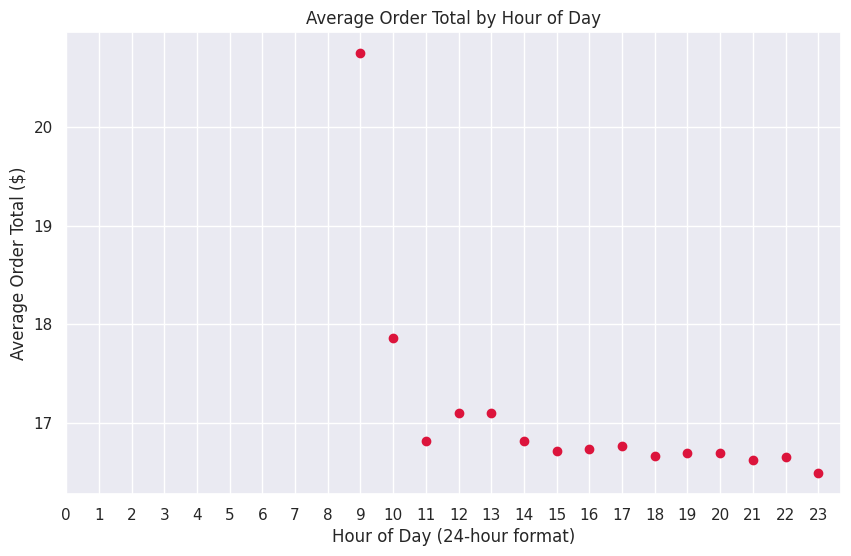

In [40]:
 #Converting 'order_time' to datetime and extracting the hour
pizza_sales_df['order_time'] = pd.to_datetime(pizza_sales_df['order_time'], format='%H:%M:%S').dt.time
pizza_sales_df['hour_of_day'] = pizza_sales_df['order_time'].apply(lambda x: x.hour)

# Grouping by hour_of_day and calculating the average order total
average_order_total_by_hour = pizza_sales_df.groupby('hour_of_day')['total_price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(average_order_total_by_hour.index, average_order_total_by_hour, color='crimson')
plt.title('Average Order Total by Hour of Day')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Average Order Total ($)')
plt.xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.show()



###The scatter plot above visualizes the average order total by the hour of the day, and the correlation coefficient between these two variables is approximately -0.62. This negative correlation suggests that as the hour of the day increases, the average order total tends to decrease.

###Key Observations:

The highest average order totals appear to occur in the earlier hours of the day.
As the day progresses into later hours, the average order total decreases.
This correlation might be influenced by factors such as customer preferences, availability of menu items, or promotional activities at different times of the day.



In [41]:
# Correlation coefficient
correlation_coefficient = average_order_total_by_hour.corr(pizza_sales_df.groupby('hour_of_day')['hour_of_day'].mean())
print(correlation_coefficient)

-0.6185904297681367


The correlation coefficient provides a quantitative measure of this relationship, where a value close to -1 indicates a strong negative correlation.

#10.Pizzas populaires :
##a. Quelles sont les 5 pizzas les plus commandées en quantité ?

In [42]:
# Finding the top 5 most ordered pizzas by quantity
top_pizzas_by_quantity = pizza_sales_df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(5)
print(top_pizzas_by_quantity)


pizza_name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


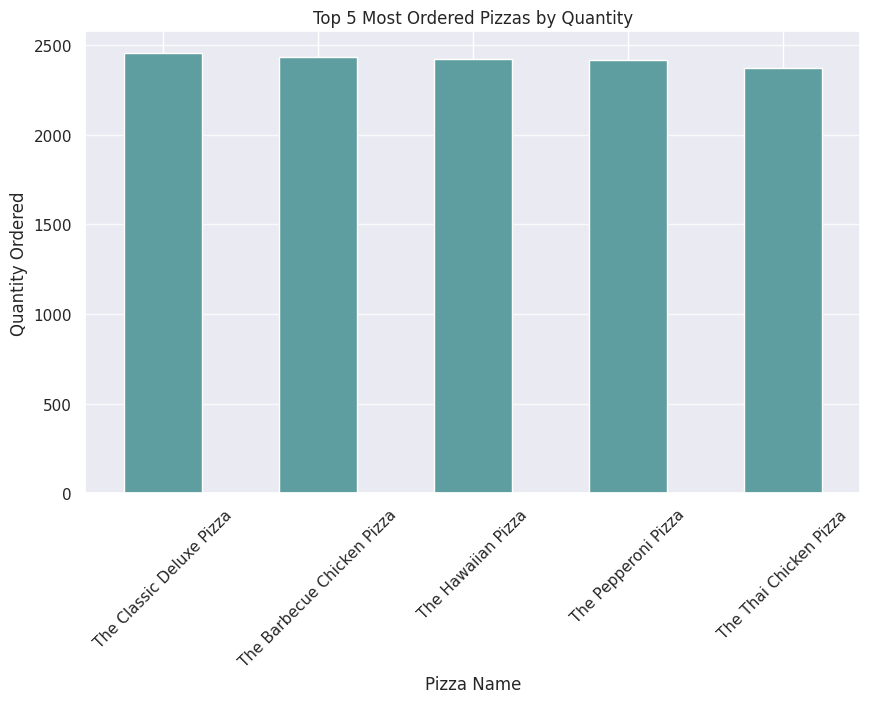

In [43]:
# Visualizing the top 5 most ordered pizzas by quantity
plt.figure(figsize=(10, 6))
top_pizzas_by_quantity.plot(kind='bar', color='cadetblue')
plt.title('Top 5 Most Ordered Pizzas by Quantity')
plt.xlabel('Pizza Name')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

##b. Quelles sont les 5 pizzas les plus commandées en termes de chiffre d'affaires ?

In [44]:
# Finding the top 5 most ordered pizzas in terms of revenue
pizza_sales_df.groupby('pizza_name')['total_price'].sum().sort_values( ascending=False).head(5)

pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: total_price, dtype: float64

#11.Chiffre d'affaires par taille et catégorie :
##a. Quelle est la répartition du chiffre d'affaires pour chaque taille de pizza ?

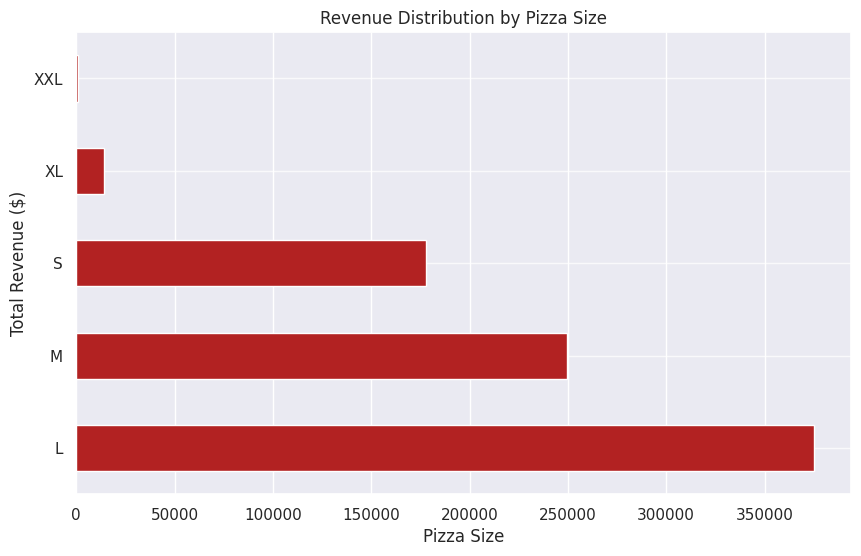

In [45]:
# Calculating the revenue distribution for each pizza size
revenue_by_pizza_size = pizza_sales_df.groupby('pizza_size')['total_price'].sum()


# Visualizing the revenue distribution
plt.figure(figsize=(10, 6))
revenue_by_pizza_size.plot(kind='barh', color='firebrick')
plt.title('Revenue Distribution by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

The bar chart above illustrates the revenue distribution for each pizza size. Each bar represents the total revenue generated by a specific size of pizza, providing a clear view of how different pizza sizes contribute to overall sales.

Key observations from the visualization:

The chart shows the comparative revenue generated by each pizza size.
The length of each bar corresponds to the total revenue for that size category.

##Quelle est la répartition du chiffre d'affaires pour chaque catégorie de pizza ?

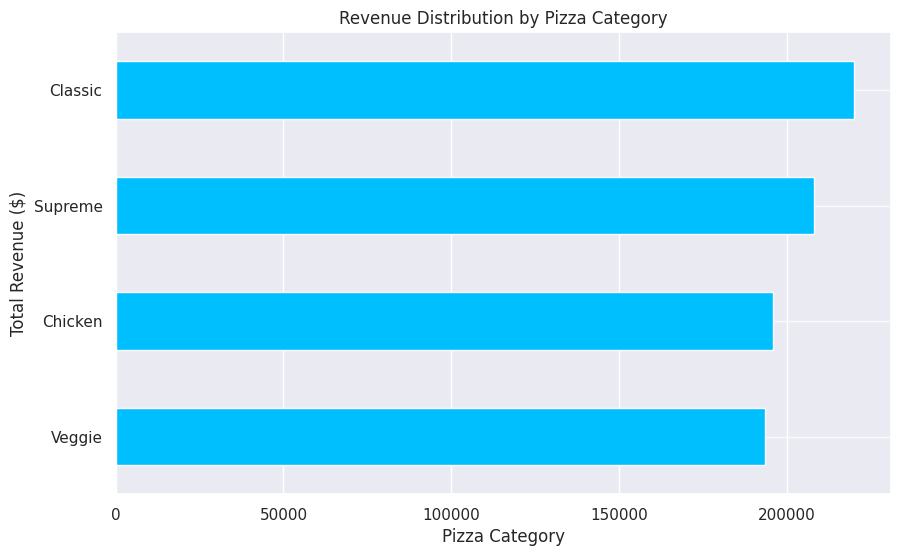

In [46]:
# Calculating the revenue distribution for each pizza category
revenue_by_pizza_category = pizza_sales_df.groupby('pizza_category')['total_price'].sum().sort_values()

# Visualizing the revenue distribution
plt.figure(figsize=(10, 6))
revenue_by_pizza_category.plot(kind='barh', color='deepskyblue')
plt.title('Revenue Distribution by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

#12.Corrélation entre prix et quantité :
##a. Y a-t-il une corrélation entre le prix unitaire et la quantité commandée ?

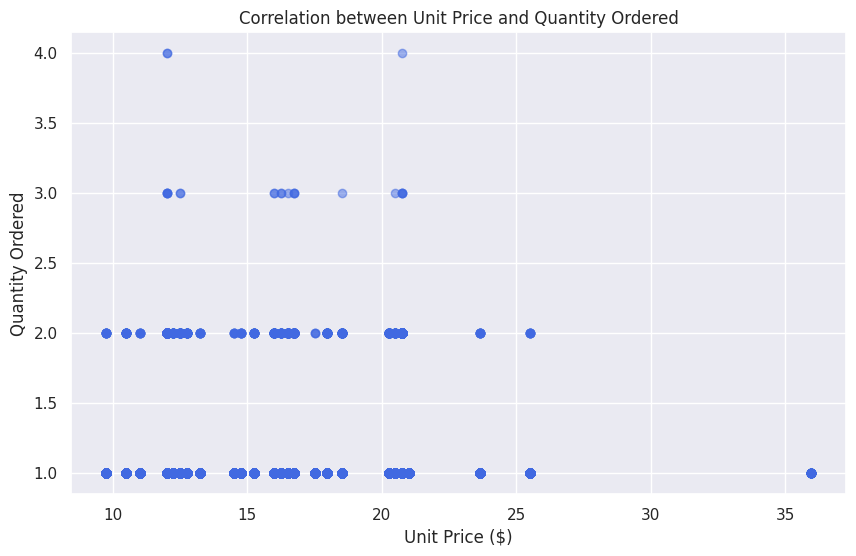

Correlation coefficient: 0.0071


In [47]:
# Checking for correlation between unit price and quantity ordered
correlation_unit_price_quantity = pizza_sales_df['unit_price'].corr(pizza_sales_df['quantity'])

# Plotting the relationship
plt.figure(figsize=(10, 6))
plt.scatter(pizza_sales_df['unit_price'], pizza_sales_df['quantity'], alpha=0.5, color='royalblue')
plt.title('Correlation between Unit Price and Quantity Ordered')
plt.xlabel('Unit Price ($)')
plt.ylabel('Quantity Ordered')
plt.grid(True)
plt.show()

rounded_correlation_unit_price_quantity = round(correlation_unit_price_quantity, 4)

print("Correlation coefficient:", rounded_correlation_unit_price_quantity)

The scatter plot above visualizes the relationship between the unit price of pizzas and the quantity ordered. The correlation coefficient between unit price and quantity ordered is approximately 0.0071.

Key observations:

The correlation coefficient is very close to zero, indicating a negligible linear relationship between unit price and quantity ordered.
The scatter plot shows a wide distribution of points without any apparent pattern or trend.
This suggests that the unit price of pizzas does not have a significant linear impact on the quantity of pizzas ordered, based on this dataset.

##b. Quel est le prix unitaire moyen pour différentes tailles de pizza ?

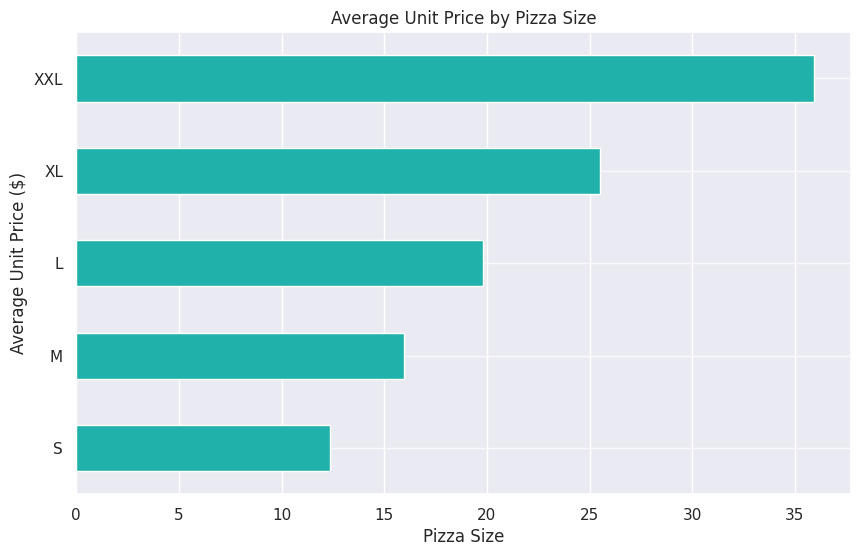

In [48]:
# Calculating the average unit price for different pizza sizes
average_unit_price_by_size = pizza_sales_df.groupby('pizza_size')['unit_price'].mean().sort_values()

# Visualizing the average unit price
plt.figure(figsize=(10, 6))
average_unit_price_by_size.plot(kind='barh', color='lightseagreen')
plt.title('Average Unit Price by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Average Unit Price ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

The bar chart above shows the average unit price for different pizza sizes. Each bar represents the average price of pizzas for a specific size category.

Key insights from the chart:

Larger pizza sizes generally have a higher average unit price.
The Extra Extra Large (XXL) size has the highest average unit price, while the Small (S) size has the lowest.
This visualization and analysis help in understanding the pricing structure across different pizza sizes.

#13.Tendances saisonnières :
##a. Y a-t-il des tendances saisonnières dans les commandes de pizza ?

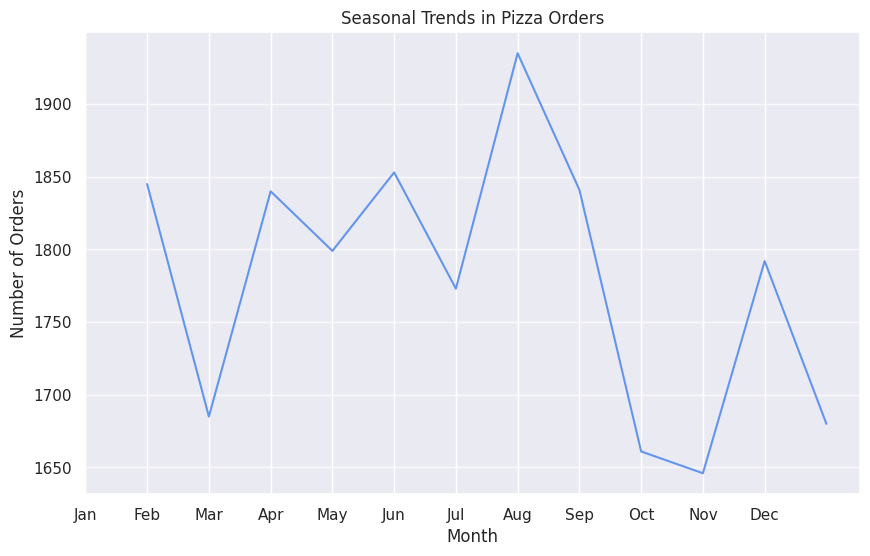

In [49]:
# Extracting month from the order_date
pizza_sales_df['month'] = pizza_sales_df['order_date'].dt.month

# Grouping data by month and counting the number of orders
monthly_orders = pizza_sales_df.groupby('month')['order_id'].nunique()

# Visualizing the seasonal trends
plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='line', color='cornflowerblue')
plt.title('Seasonal Trends in Pizza Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

The bar chart above illustrates the seasonal trends in pizza orders by month. Each bar represents the number of orders placed in a specific month, providing insight into how order volume varies throughout the year.

Key observations:

The chart shows the fluctuation in the number of orders across different months.
Certain months may exhibit higher or lower order volumes, indicating seasonal trends.
This visualization is useful for identifying periods of higher demand, which can inform marketing strategies, inventory management, and resource allocation.



###lets dig deeper using :




Category-wise Monthly Trends:

Shows the monthly distribution of pizza orders by category (like Veggie, Classic, Supreme).
Helps identify which categories are more popular in specific months.

Size-wise Monthly Trends:

Illustrates the popularity of different pizza sizes throughout the year.
Useful for identifying if certain sizes are favored in specific seasons or months.

Ingredient-based Seasonal Trends:

Focuses on the popularity of key ingredients (e.g., Pepperoni, Mushrooms, Garlic) across months.
Indicates if certain ingredients have seasonal demand patterns.

Day of the Week Analysis:

Displays variations in pizza orders based on the day of the week for each month.
Can reveal weekly patterns, such as increased orders on weekends.

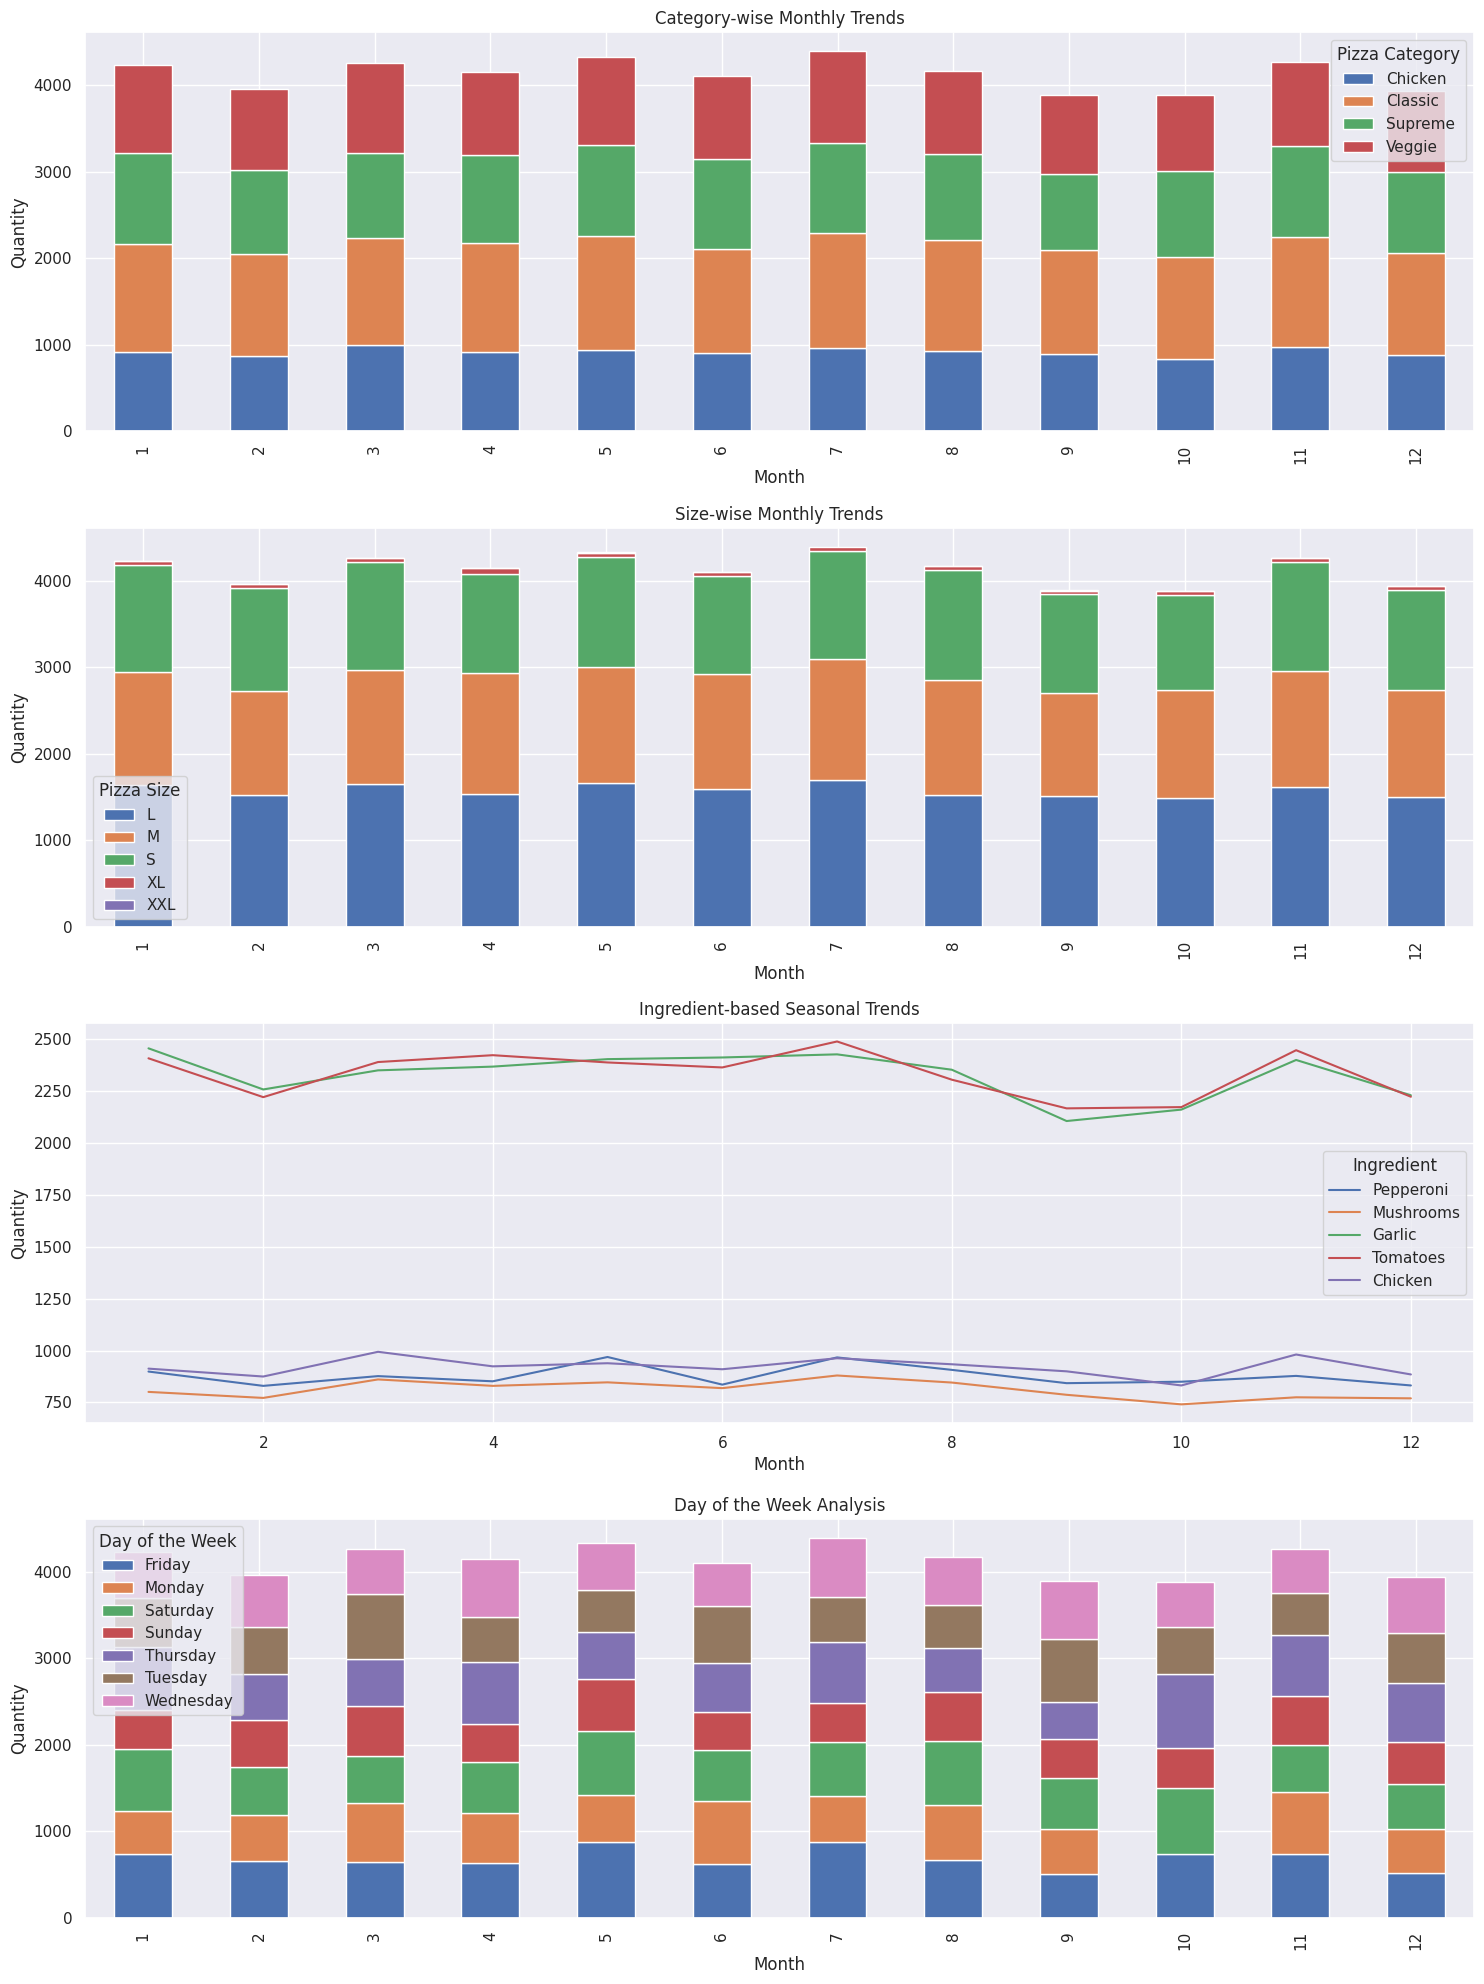

In [50]:
# Extracting month and day of the week
pizza_sales_df['month'] = pizza_sales_df['order_date'].dt.month
pizza_sales_df['day_of_week'] = pizza_sales_df['order_date'].dt.day_name()

# Category-wise Monthly Trends
category_monthly_trends = pizza_sales_df.groupby(['month', 'pizza_category'])['quantity'].sum().unstack()

# Size-wise Monthly Trends
size_monthly_trends = pizza_sales_df.groupby(['month', 'pizza_size'])['quantity'].sum().unstack()

# Ingredient-based Seasonal Trends for selected ingredients
key_ingredients = ["Pepperoni", "Mushrooms", "Garlic", "Tomatoes", "Chicken"]
ingredient_monthly_trends = {ingredient: pizza_sales_df[pizza_sales_df['pizza_ingredients'].str.contains(ingredient, case=False, na=False)].groupby('month')['quantity'].sum() for ingredient in key_ingredients}

# Day of the Week Analysis
day_of_week_trends = pizza_sales_df.groupby(['month', 'day_of_week'])['quantity'].sum().unstack()

# Preparing for visualization
fig, axs = plt.subplots(4, 1, figsize=(15, 20))

# Plotting Category-wise Monthly Trends
category_monthly_trends.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Category-wise Monthly Trends')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Quantity')
axs[0].legend(title='Pizza Category')

# Plotting Size-wise Monthly Trends
size_monthly_trends.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Size-wise Monthly Trends')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Quantity')
axs[1].legend(title='Pizza Size')

# Plotting Ingredient-based Seasonal Trends
for ingredient, data in ingredient_monthly_trends.items():
    axs[2].plot(data, label=ingredient)
axs[2].set_title('Ingredient-based Seasonal Trends')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Quantity')
axs[2].legend(title='Ingredient')

# Plotting Day of the Week Analysis
day_of_week_trends.plot(kind='bar', stacked=True, ax=axs[3])
axs[3].set_title('Day of the Week Analysis')
axs[3].set_xlabel('Month')
axs[3].set_ylabel('Quantity')
axs[3].legend(title='Day of the Week', loc='upper left')

plt.tight_layout()
plt.show()

#b. Y a-t-il une corrélation entre le jour de la semaine et la quantité de commandes ?

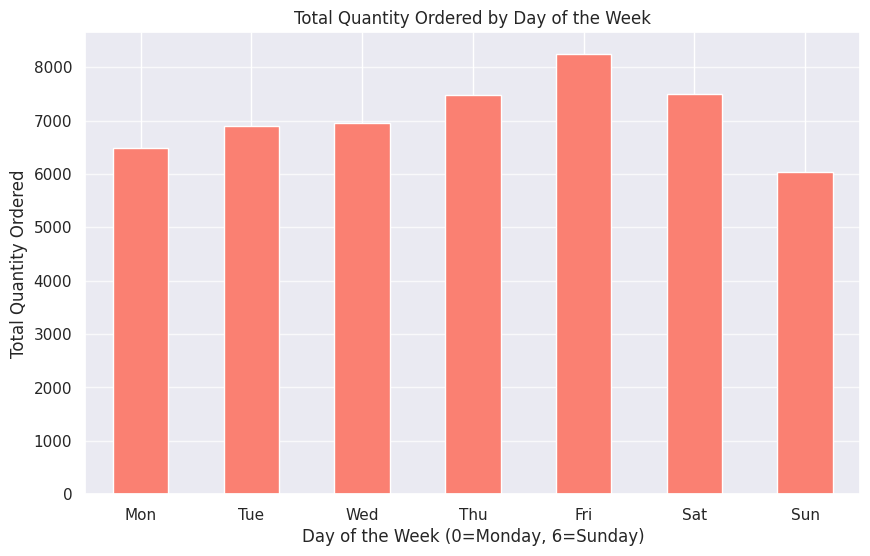

Correlation coefficient: 0.1210736891849494


In [51]:
# Convert day of the week to a numeric format and calculate total quantity by day
pizza_sales_df['day_of_week_numeric'] = pizza_sales_df['order_date'].dt.dayofweek
total_quantity_by_day = pizza_sales_df.groupby('day_of_week_numeric')['quantity'].sum()

# Correlation coefficient
correlation_day_quantity = total_quantity_by_day.corr(pizza_sales_df.groupby('day_of_week_numeric')['day_of_week_numeric'].mean())

# Plotting
plt.figure(figsize=(10, 6))
total_quantity_by_day.plot(kind='bar', color='salmon')
plt.title('Total Quantity Ordered by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Quantity Ordered')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Correlation coefficient:", correlation_day_quantity)


The bar chart visualizes the total quantity of pizzas ordered by day of the week, and the correlation coefficient between the day of the week and order quantity is approximately 0.121.

Key Observations:

The correlation coefficient is positive but close to zero, suggesting a weak linear relationship between the day of the week and the total quantity of orders.
The bar chart provides a visual representation of how the total quantity of pizzas ordered varies across different days of the week.
This analysis indicates that while there might be some variation in order quantities based on the day of the week, it is not strongly linear in nature.

<ipython-input-52-36812950ac56>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_trends = pizza_sales_df.groupby(pizza_sales_df['order_date'].dt.to_period("M")).sum()['total_price']


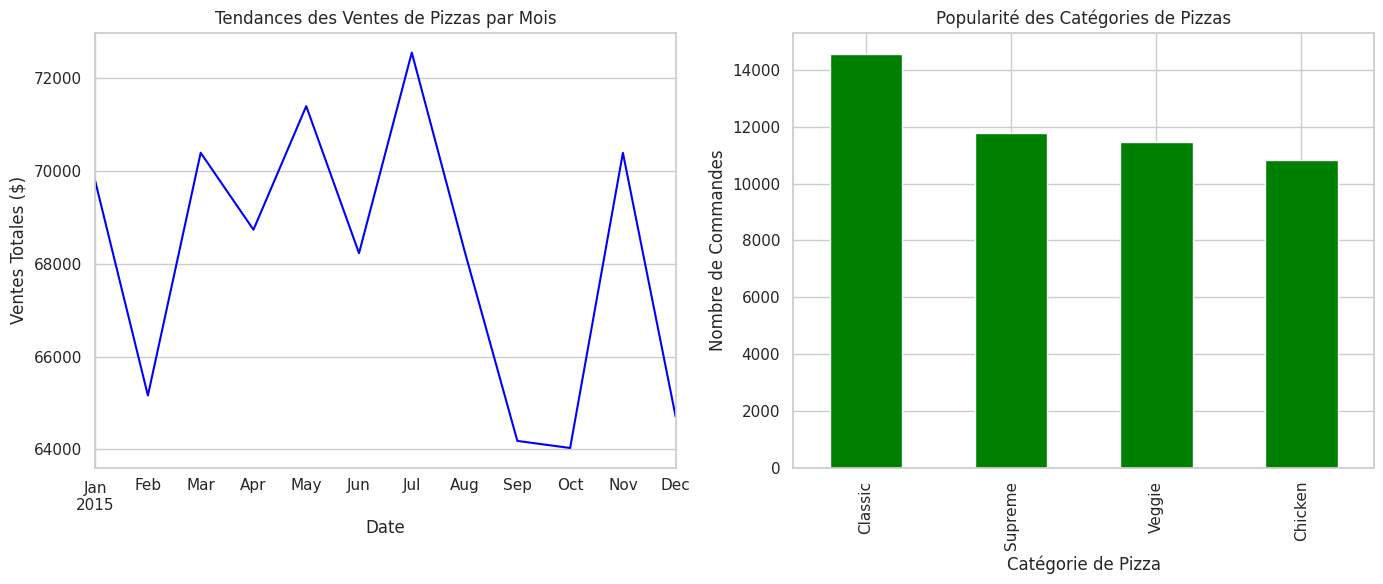

In [52]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Tendances Temporelles: Analyse des ventes de pizzas au fil du temps
pizza_sales_df['order_date'] = pd.to_datetime(pizza_sales_df['order_date'])
sales_trends = pizza_sales_df.groupby(pizza_sales_df['order_date'].dt.to_period("M")).sum()['total_price']

# 2. Analyse des Catégories de Pizzas: Les catégories les plus populaires
category_counts = pizza_sales_df['pizza_category'].value_counts()

# Plotting the data
plt.figure(figsize=(14, 6))

# Plot for Sales Trends
plt.subplot(1, 2, 1)
sales_trends.plot(kind='line', color='blue')
plt.title('Tendances des Ventes de Pizzas par Mois')
plt.xlabel('Date')
plt.ylabel('Ventes Totales ($)')

# Plot for Pizza Category Popularity
plt.subplot(1, 2, 2)
category_counts.plot(kind='bar', color='green')
plt.title('Popularité des Catégories de Pizzas')
plt.xlabel('Catégorie de Pizza')
plt.ylabel('Nombre de Commandes')

plt.tight_layout()
plt.show()

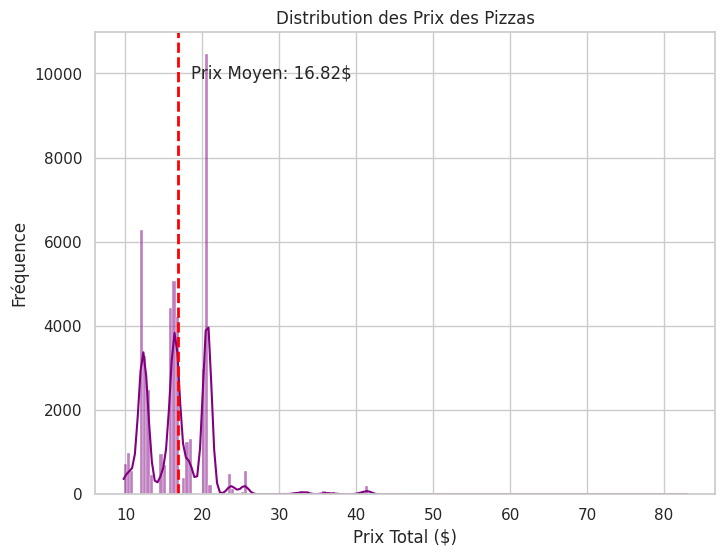

In [53]:
# Calculating the average price of pizzas
average_price = pizza_sales_df['total_price'].mean()

# Plotting the distribution of pizza prices
plt.figure(figsize=(8, 6))
sns.histplot(pizza_sales_df['total_price'], kde=True, color='purple')
plt.title('Distribution des Prix des Pizzas')
plt.xlabel('Prix Total ($)')
plt.ylabel('Fréquence')
plt.axvline(average_price, color='red', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(average_price*1.1, max_ylim*0.9, 'Prix Moyen: {:.2f}$'.format(average_price))

plt.show()

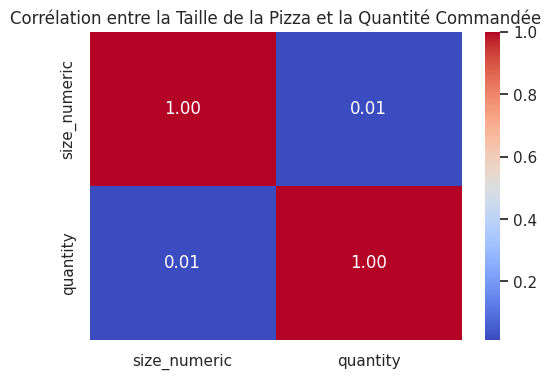

In [54]:
# Analyzing the correlation between pizza size and quantity ordered

# For correlation, we need to convert categorical data (pizza_size) into numerical values
size_mapping = {'S': 1, 'M': 2, 'L': 3}
pizza_sales_df['size_numeric'] = pizza_sales_df['pizza_size'].map(size_mapping)

# Calculating the correlation
correlation_size_quantity = pizza_sales_df[['size_numeric', 'quantity']].corr()

# Plotting the correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_size_quantity, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation entre la Taille de la Pizza et la Quantité Commandée')
plt.show()


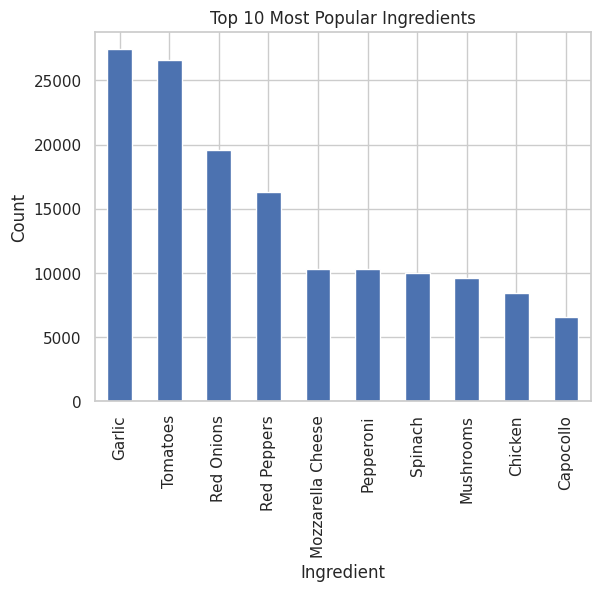

In [55]:
# Ingredient Popularity Analysis
# Splitting the ingredients and counting their occurrences

# Splitting the ingredients list and exploding it into separate rows
ingredients_split =pizza_sales_df['pizza_ingredients'].str.split(', ').explode()

# Counting the occurrences of each ingredient
ingredient_counts = ingredients_split.value_counts()

# Displaying the top 10 most common ingredients
top_10_ingredients = ingredient_counts.head(10)
top_10_ingredients.plot(kind='bar', title='Top 10 Most Popular Ingredients')
plt.xlabel('Ingredient')
plt.ylabel('Count')
plt.show()

The bar chart above displays the top 10 most popular ingredients in the pizza orders from your dataset. These ingredients are the ones most frequently ordered by customers, indicating their preferences.

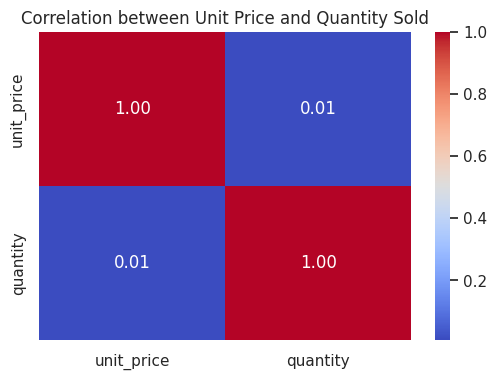

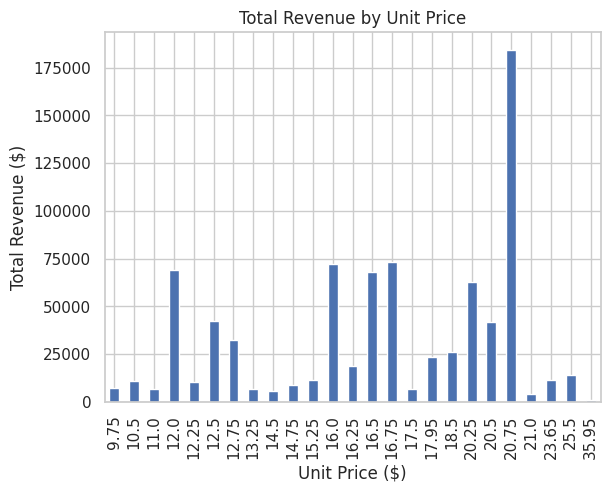

In [57]:
# Correlation Analysis between Unit Price and Quantity Sold
correlation_price_quantity = pizza_sales_df[['unit_price', 'quantity']].corr()

# Plotting the correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_price_quantity, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Unit Price and Quantity Sold')
plt.show()

# Analyzing Total Revenue Generation across Different Price Points
# Calculating total revenue for each price point
pizza_sales_df['revenue'] = pizza_sales_df['unit_price'] * pizza_sales_df['quantity']
revenue_by_price = pizza_sales_df.groupby('unit_price')['revenue'].sum()

# Plotting the total revenue by unit price
revenue_by_price.plot(kind='bar', title='Total Revenue by Unit Price')
plt.xlabel('Unit Price ($)')
plt.ylabel('Total Revenue ($)')
plt.show()



Correlation between Unit Price and Quantity Sold:

The heatmap showed the correlation coefficient between the unit price of a pizza and the number of pizzas sold. A positive value indicates that as the price increases, the quantity sold also increases, and vice versa.
Total Revenue by Unit Price:

The bar chart displays the total revenue generated at each unit price point. This visualizes how different pricing strategies contribute to overall revenue. Higher bars indicate more revenue generated at that price point, which can be key in identifying the most profitable prices.

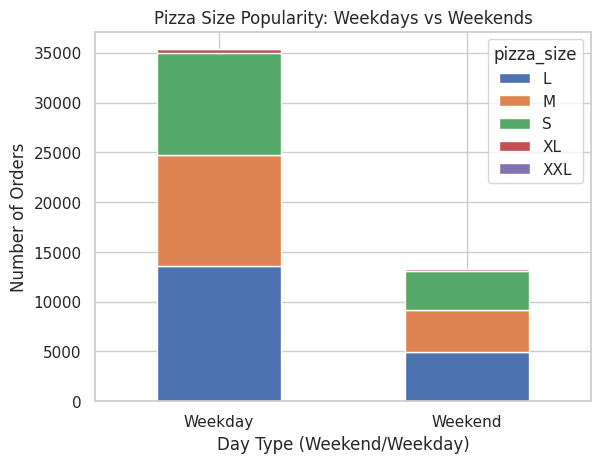

In [58]:
# Hypothesis 1 Analysis: Larger pizzas are more popular on weekends

# Creating a column to differentiate between weekdays and weekends
pizza_sales_df['weekend'] = pizza_sales_df['order_date'].dt.dayofweek.isin([5, 6])

# Segmenting the orders by day type (weekend/weekday) and pizza size
size_weekend_distribution = pizza_sales_df.groupby(['weekend', 'pizza_size']).size().unstack()

# Plotting the distribution of pizza sizes on weekdays vs weekends
size_weekend_distribution.plot(kind='bar', stacked=True, title='Pizza Size Popularity: Weekdays vs Weekends')
plt.xlabel('Day Type (Weekend/Weekday)')
plt.ylabel('Number of Orders')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], rotation=0)
plt.show()


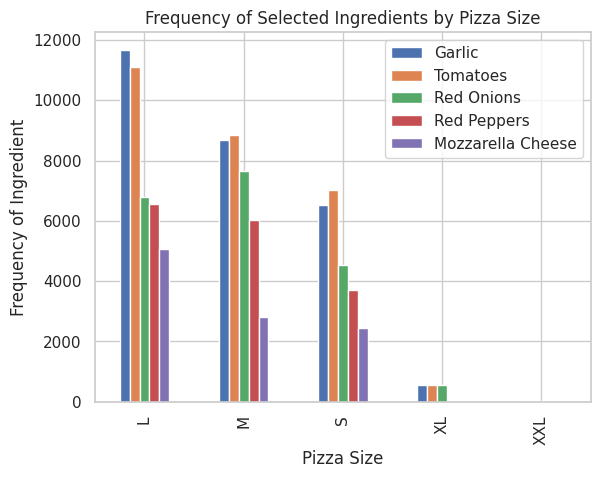

In [59]:
# Selecting top ingredients from the previous ingredient popularity analysis
selected_ingredients = top_10_ingredients.index[:5]  # Selecting top 5 ingredients for analysis

# Function to count the occurrence of selected ingredients in each pizza size
def count_ingredient_by_size(data, ingredient):
    return data[data['pizza_ingredients'].str.contains(ingredient)].groupby('pizza_size').size()

# Counting the frequency of selected ingredients in each pizza size
ingredient_size_frequency = {ingredient: count_ingredient_by_size(pizza_sales_df, ingredient) for ingredient in selected_ingredients}

# Converting the result to a DataFrame for better visualization
ingredient_size_df = pd.DataFrame(ingredient_size_frequency)

# Plotting the frequency of selected ingredients by pizza size
ingredient_size_df.plot(kind='bar', title='Frequency of Selected Ingredients by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Frequency of Ingredient')
plt.show()


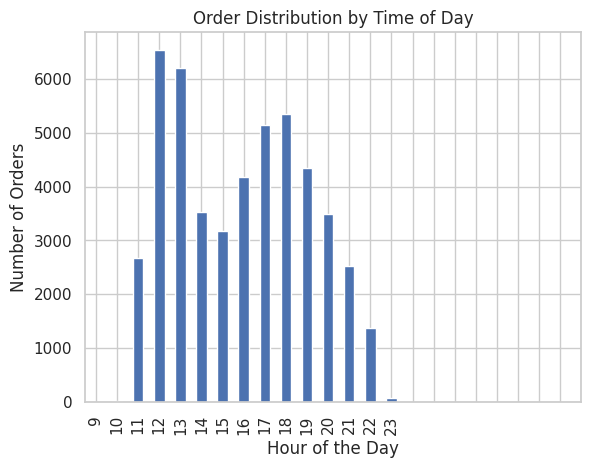

In [60]:
# Converting 'order_time' to a datetime format to extract the hour
pizza_sales_df['order_time'] = pd.to_datetime(pizza_sales_df['order_time'], format='%H:%M:%S').dt.time

# Extracting the hour component from the 'order_time'
pizza_sales_df['order_hour'] = pizza_sales_df['order_time'].apply(lambda x: x.hour)

# Counting the number of orders for each hour of the day
orders_by_hour = pizza_sales_df.groupby('order_hour').size()

# Plotting the distribution of orders across different times of the day
orders_by_hour.plot(kind='bar', title='Order Distribution by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.show()


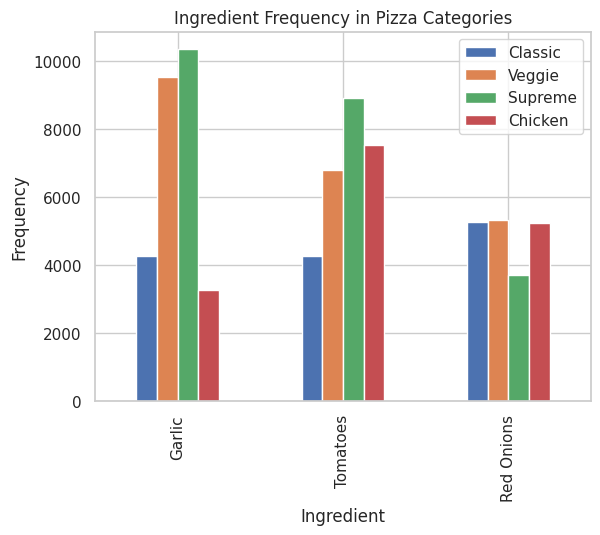

In [61]:
# Ingredient and Category Combination Analysis
# Selecting a few common ingredients for the analysis
common_ingredients = top_10_ingredients.index[:3]  # Selecting the top 3 ingredients

# Creating a DataFrame to store the frequency of these ingredients in each category
ingredient_category_freq = pd.DataFrame(index=common_ingredients, columns=pizza_sales_df['pizza_category'].unique())

# Calculating the frequency of each ingredient in each pizza category
for ingredient in common_ingredients:
    for category in ingredient_category_freq.columns:
        ingredient_category_freq.at[ingredient, category] = pizza_sales_df[
            (pizza_sales_df['pizza_ingredients'].str.contains(ingredient)) &
            (pizza_sales_df['pizza_category'] == category)
        ].shape[0]

# Plotting the frequency of selected ingredients in each pizza category
ingredient_category_freq.plot(kind='bar', title='Ingredient Frequency in Pizza Categories')
plt.xlabel('Ingredient')
plt.ylabel('Frequency')
plt.show()
